<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data(more models!)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [2]:
train_df=pd.read_csv('../datasets/train_eda_engineered_1.csv')

In [3]:
pd.set_option('display.max_columns', 200)

In [4]:
train_df.head()

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010-01-01,WD,130500,0,0,1,0,0,0,0,0,1,0,0,0,0
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009-01-01,WD,220000,0,0,1,0,0,0,0,0,1,0,0,0,1
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010-01-01,WD,109000,0,0,1,0,0,1,0,0,0,0,0,0,0
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010-01-01,WD,174000,0,0,1,0,0,0,0,0,1,0,0,0,0
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010-01-01,WD,138500,0,0,1,0,0,0,0,0,0,0,0,0,0


## A little more data cleanup

In [5]:
train_df['kitchen_qual'].value_counts()

TA    925
Gd    767
Ex    145
Fa     29
Name: kitchen_qual, dtype: int64

In [6]:
train_df['bldg_type'].value_counts()

1Fam      1580
TwnhsE     157
Twnhs       62
Duplex      37
2fmCon      30
Name: bldg_type, dtype: int64

In [7]:
train_df=pd.get_dummies(columns=['kitchen_qual','bldg_type'], data=train_df, drop_first=True)
train_df.head()
#more relevant features per article https://www.usatoday.com/story/money/personalfinance/2013/04/28/24-7-home-features/2106203/

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976-01-01,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010-01-01,WD,130500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996-01-01,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009-01-01,WD,220000,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010-01-01,WD,109000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006-01-01,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010-01-01,WD,174000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900-01-01,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010-01-01,WD,138500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [8]:
train_df['year_built']=pd.DatetimeIndex(train_df.year_built).year
train_df['yr_sold']=pd.DatetimeIndex(train_df.yr_sold).year


In [9]:
train_df['age_home']=train_df['yr_sold']-train_df['year_built']
#get age of home as per research people gravitate to newer homes

In [10]:
train_df['age_home'].describe()

count    1866.000000
mean       34.334405
std        29.300453
min        -1.000000
25%         7.000000
50%        32.000000
75%        52.000000
max       128.000000
Name: age_home, dtype: float64

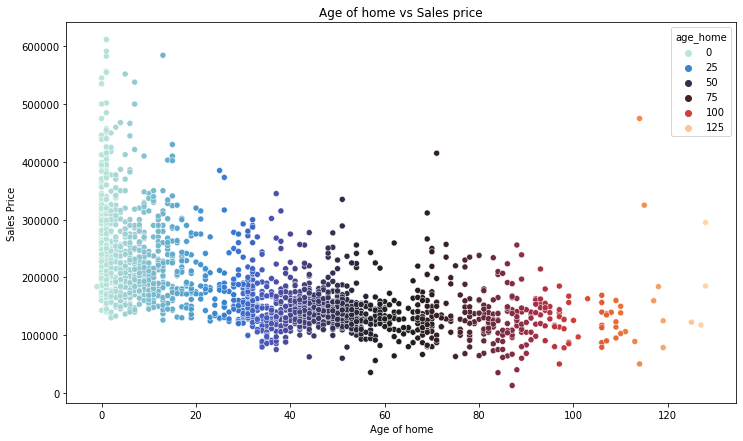

In [11]:
plt.figure(figsize=(12,7))
plt.title('Age of home vs Sales price')
plt.xlabel('Age of home')
plt.ylabel('Sales Price');
sns.scatterplot(data=train_df,x=train_df['age_home'], y=train_df['saleprice'],hue='age_home',palette='icefire');
plt.savefig('../images/age_home_salesprice.png')

Age of home is a feature that was engineered with a negative correlation, which dictates that the "younger" the home the more the sales price is.

In [12]:
train_df

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,age_home
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010,WD,130500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,34
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,13
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,57
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,4
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,1587,921126030,20,11449,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,8,5,2007,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,1,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,7,Typ,1,Attchd,Fin,2.0,520.0,TA,TA,1,0,276,0,0,0,0,0,1,2008,WD,298751,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1
1862,785,905377130,30,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,4,5,1940,1950-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,1,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,4,Typ,0,Detchd,Unf,2.0,539.0,TA,TA,1,158,0,0,0,0,0,0,3,2009,WD,82500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,69
1863,916,909253010,50,7558,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,6,6,1928,1950-01-01,Gable,CompShg,BrkFace,S

In [13]:
train_df.to_csv('../datasets/train_eda_engineered_2.csv', index=False)

In [14]:
train_df.head()

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,age_home
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010,WD,130500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,34
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,13
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,57
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,4
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110


## EDA:Correlation & Heatmap

In [15]:
train_df.corr()[['saleprice']].sort_values(by='saleprice',ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.793771
gr_liv_area,0.707227
high_qual,0.697947
garage_cars,0.653573
garage_area,0.646123
1st_flr_sf,0.625741
total_bsmt_sf,0.624425
best_gr_liv_area,0.578111
year_built,0.556128


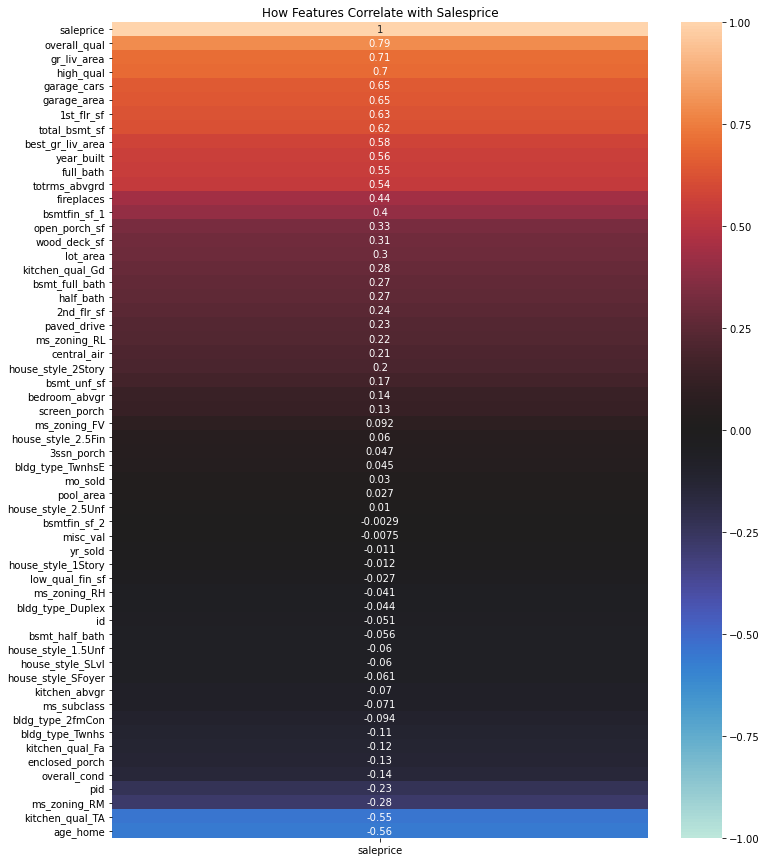

In [16]:
plt.figure(figsize=(12,15))
plt.title('How Features Correlate with Salesprice')
sns.heatmap(train_df.corr()[['saleprice']].sort_values(by='saleprice',
                                                       ascending=False),
            cmap='icefire', 
            annot=True, vmin=-1, vmax=1);
plt.savefig('../images/heat_map.png')

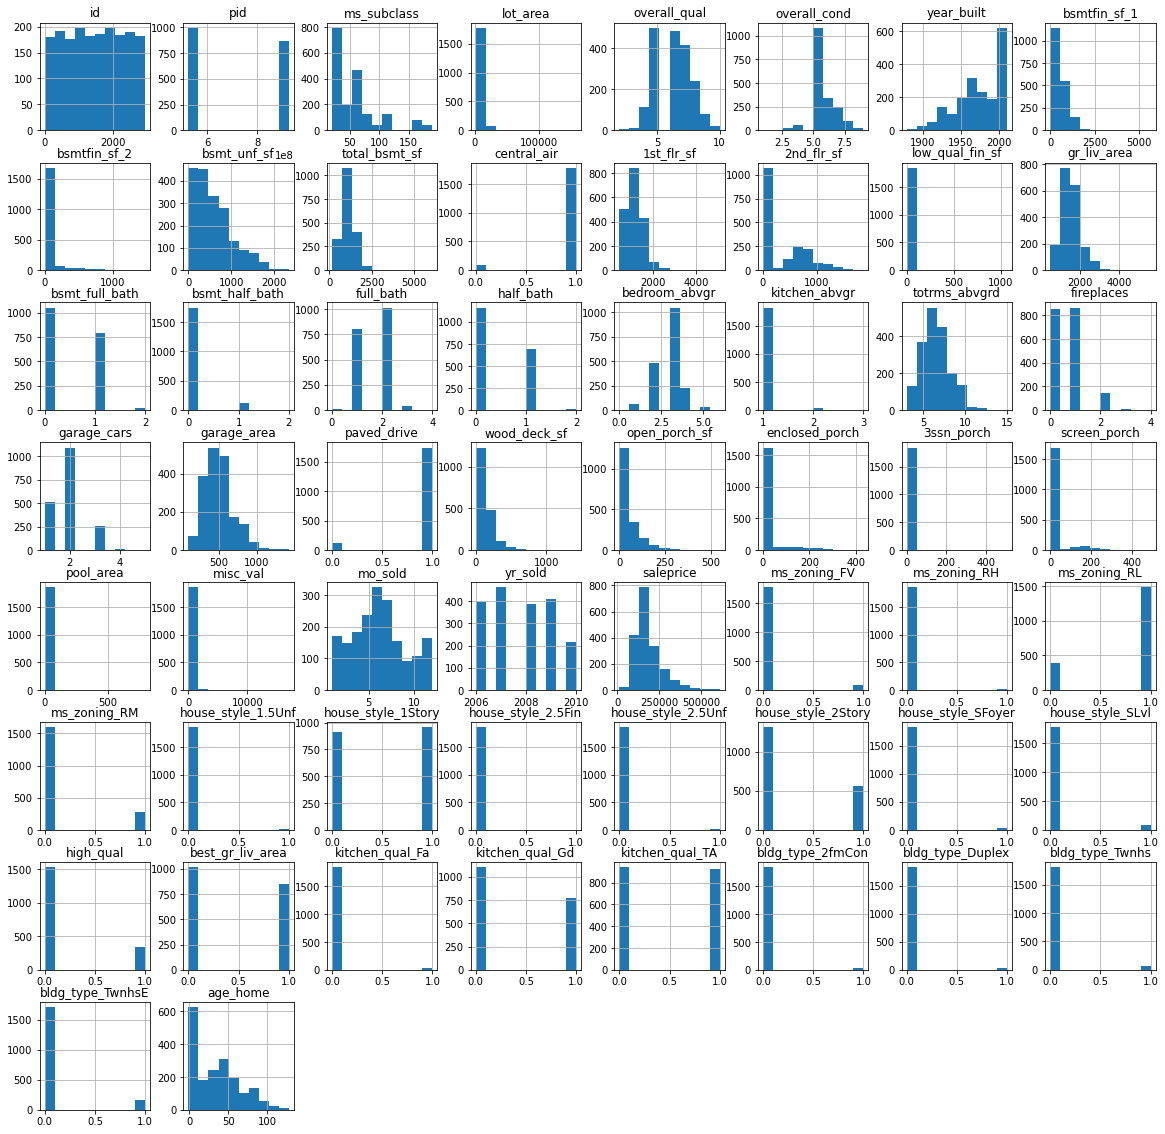

In [17]:
train_df.hist(figsize=(20,20));

## Model 3

## Model Prep:Train/test split

In [18]:
features=[col for col in train_df._get_numeric_data().columns if col != 'saleprice']
#Lesson Model workflow

X=train_df[features]
y=train_df['saleprice']
X.head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,age_home
0,109,533352170,60,13517,6,8,1976,533.0,0.0,192.0,725.0,1,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,1,0,44,0,0,0,0,0,3,2010,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,34
1,544,531379050,60,11492,7,5,1996,637.0,0.0,276.0,913.0,1,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,1,0,74,0,0,0,0,0,4,2009,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,13
2,153,535304180,20,7922,5,7,1953,731.0,0.0,326.0,1057.0,1,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1.0,246.0,1,0,52,0,0,0,0,0,1,2010,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,57
3,318,916386060,60,9802,5,5,2006,0.0,0.0,384.0,384.0,1,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2.0,400.0,1,100,0,0,0,0,0,0,4,2010,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,4
4,255,906425045,50,14235,6,8,1900,0.0,0.0,676.0,676.0,1,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,2.0,484.0,0,0,59,0,0,0,0,0,3,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110


## Polynomial Features

In [19]:
poly=PolynomialFeatures(include_bias=False)

In [20]:
X_poly=poly.fit_transform(X)

In [21]:
poly.get_feature_names(features)[1]

'pid'

In [22]:
pd.DataFrame(X_poly, columns= poly.get_feature_names(features)).head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,age_home,id^2,id pid,id ms_subclass,id lot_area,id overall_qual,id overall_cond,id year_built,id bsmtfin_sf_1,id bsmtfin_sf_2,id bsmt_unf_sf,id total_bsmt_sf,id central_air,id 1st_flr_sf,id 2nd_flr_sf,id low_qual_fin_sf,id gr_liv_area,id bsmt_full_bath,id bsmt_half_bath,id full_bath,id half_bath,id bedroom_abvgr,id kitchen_abvgr,id totrms_abvgrd,id fireplaces,id garage_cars,id garage_area,id paved_drive,id wood_deck_sf,id open_porch_sf,id enclosed_porch,id 3ssn_porch,id screen_porch,id pool_area,id misc_val,id mo_sold,id yr_sold,id ms_zoning_FV,id ms_zoning_RH,id ms_zoning_RL,id ms_zoning_RM,id house_style_1.5Unf,id house_style_1Story,id house_style_2.5Fin,...,house_style_2.5Unf best_gr_liv_area,house_style_2.5Unf kitchen_qual_Fa,house_style_2.5Unf kitchen_qual_Gd,house_style_2.5Unf kitchen_qual_TA,house_style_2.5Unf bldg_type_2fmCon,house_style_2.5Unf bldg_type_Duplex,house_style_2.5Unf bldg_type_Twnhs,house_style_2.5Unf bldg_type_TwnhsE,house_style_2.5Unf age_home,house_style_2Story^2,house_style_2Story house_style_SFoyer,house_style_2Story house_style_SLvl,house_style_2Story high_qual,house_style_2Story best_gr_liv_area,house_style_2Story kitchen_qual_Fa,house_style_2Story kitchen_qual_Gd,house_style_2Story kitchen_qual_TA,house_style_2Story bldg_type_2fmCon,house_style_2Story bldg_type_Duplex,house_style_2Story bldg_type_Twnhs,house_style_2Story bldg_type_TwnhsE,house_style_2Story age_home,house_style_SFoyer^2,house_style_SFoyer house_style_SLvl,house_style_SFoyer high_qual,house_style_SFoyer best_gr_liv_area,house_style_SFoyer kitchen_qual_Fa,house_style_SFoyer kitchen_qual_Gd,house_style_SFoyer kitchen_qual_TA,house_style_SFoyer bldg_type_2fmCon,house_style_SFoyer bldg_type_Duplex,house_style_SFoyer bldg_type_Twnhs,house_style_SFoyer bldg_type_TwnhsE,house_style_SFoyer age_home,house_style_SLvl^2,house_style_SLvl high_qual,house_style_SLvl best_gr_liv_area,house_style_SLvl kitchen_qual_Fa,house_style_SLvl kitchen_qual_Gd,house_style_SLvl kitchen_qual_TA,house_style_SLvl bldg_type_2fmCon,house_style_SLvl bldg_type_Duplex,house_style_SLvl bldg_type_Twnhs,house_style_SLvl bldg_type_TwnhsE,house_style_SLvl age_home,high_qual^2,high_qual best_gr_liv_area,high_qual kitchen_qual_Fa,high_qual kitchen_qual_Gd,high_qual kitchen_qual_TA,high_qual bldg_type_2fmCon,high_qual bldg_type_Duplex,high_qual bldg_type_Twnhs,high_qual bldg_type_TwnhsE,high_qual age_home,best_gr_liv_area^2,best_gr_liv_area kitchen_qual_Fa,best_gr_liv_area kitchen_qual_Gd,best_gr_liv_area kitchen_qual_TA,best_gr_liv_area bldg_type_2fmCon,best_gr_liv_area bldg_type_Duplex,best_gr_liv_area bldg_type_Twnhs,best_gr_liv_area bldg_type_TwnhsE,best_gr_liv_area age_home,kitchen_qual_Fa^2,kitchen_qual_Fa kitchen_qual_Gd,kitchen_qual_Fa kitchen_qual_TA,kitchen_qual_Fa bldg_type_2fmCon,kitchen_qual_Fa bldg_type_Duplex,kitchen_qual_Fa bldg_type_Twnhs,kitchen_qual_Fa bldg_type_TwnhsE,kitchen_qual_Fa age_home,kitchen_qual_Gd^2,kitchen_qual_Gd kitchen_qual_TA,kitchen_qual_Gd bldg_type_2fmCon,kitchen_qual_Gd bldg_type_Duplex,kitchen_qual_Gd bldg_type_Twnhs,kitchen_qual_Gd bldg_type_TwnhsE,kitchen_qual_Gd age_home,kitchen_qual_TA^2,kitchen_qual_TA bldg_type_2fmCon,kitchen_qual_TA bldg_type_Duplex,kitchen_qual_TA bldg_type_Twnhs,kitchen_qual_TA bl

In [23]:
X_train,X_test,y_train, y_test= train_test_split(X_poly, y, train_size=.7, random_state=42)

In [24]:
linreg=LinearRegression()

In [25]:
#Training Cross Val
cross_val_score(linreg,X_train,y_train).mean()

-0.12157563758938743

In [26]:
#Testing Cross Val
cross_val_score(linreg,X_test, y_test).mean()

-1.3187463190114541

In [27]:
linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
linreg.score(X_train, y_train)

0.9420343401125173

In [29]:
linreg.score(X_test, y_test)

-0.4197117079884216

In [30]:
lrpreds_train=linreg.predict(X_train)
lrpreds_test=linreg.predict(X_test)

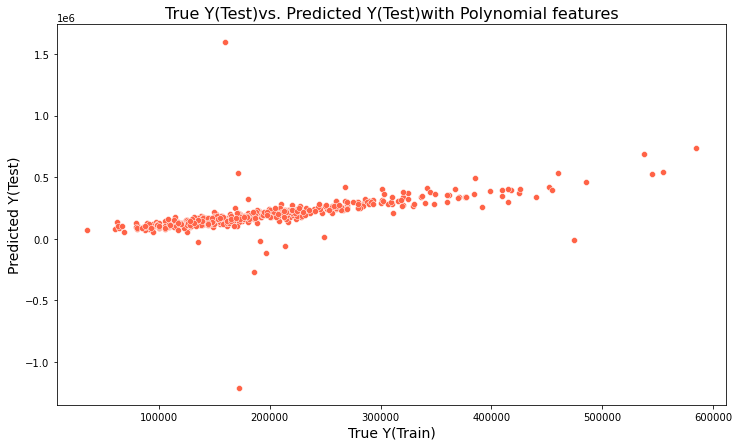

In [31]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)with Polynomial features',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data= linreg, x=y_test, y=lrpreds_test, color='tomato');
plt.savefig('../images/3rd_model_train.png')

This model is doing worse than the first model when it comes to generalizing to new data. While the R2 scoring was high on the training data set 94%. R2 can have a negative value when the model is so bad at following the trend of the data that it does worse to fit it than a horizontal line or just picking something at random. The R2 for the test data was -42%.  It looks like executing the polynomial features on all the existing features did not do the trick, and its back to the drawing board. The next model will also make use of standard scaler since the different dimensions that all these features use could have become way too different in magnitude. 
https://medium.com/analytics-vidhya/is-it-possible-to-have-a-negative-r-square-847a6a4a2fbe

In [32]:
train2=pd.read_csv('../datasets/train_eda_engineered_2.csv')

In [33]:
train2.head()

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,age_home
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010,WD,130500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,34
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,13
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,57
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,4
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110


In [34]:
train_df.corr()[['saleprice']].sort_values(by='saleprice',ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.793771
gr_liv_area,0.707227
high_qual,0.697947
garage_cars,0.653573
garage_area,0.646123
1st_flr_sf,0.625741
total_bsmt_sf,0.624425
best_gr_liv_area,0.578111
year_built,0.556128


In [35]:
features_2=[col for col in train_df._get_numeric_data().columns if col != 'saleprice']
#Lesson Model workflow

X_2=train_df[features]
y_2=train_df['saleprice']


poly_2=PolynomialFeatures(include_bias=False)

X_poly_2=poly_2.fit_transform(X_2)

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X_2, y_2, test_size=.7, random_state=42)

In [37]:
sc=StandardScaler()
Z_train=sc.fit_transform(X_train)
Z_test=sc.transform(X_test)


In [38]:
linreg2=LinearRegression()

In [39]:
linreg2.fit(Z_train,y_train)

LinearRegression()

In [40]:
print(f"Training R-Squared: {linreg2.score(Z_train, y_train)}")
print(f"Testing R-Squared: {linreg2.score(Z_test, y_test)}")

Training R-Squared: 0.8824481051072369
Testing R-Squared: 0.8064262267775444


In [41]:
Z_train_preds=linreg2.predict(Z_train)

In [42]:
Z_test_preds=linreg2.predict(Z_test)

In [43]:
Z_test.shape, Z_train.shape

((1307, 57), (559, 57))

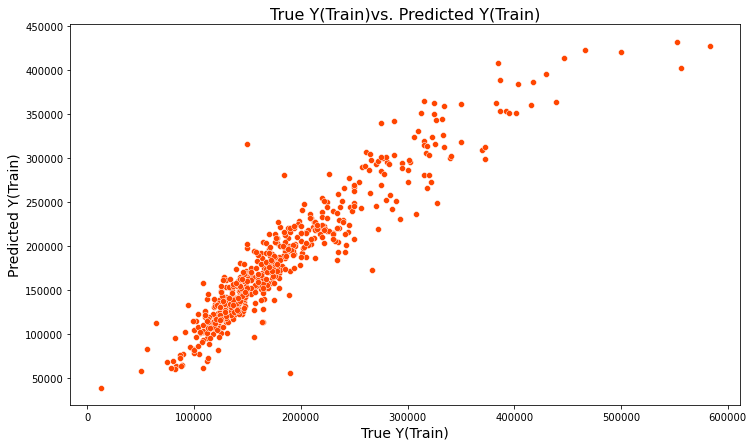

In [44]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data= linreg2,x=y_train, y=Z_train_preds,color='orangered');
plt.savefig('../images/4th_model_train.png')

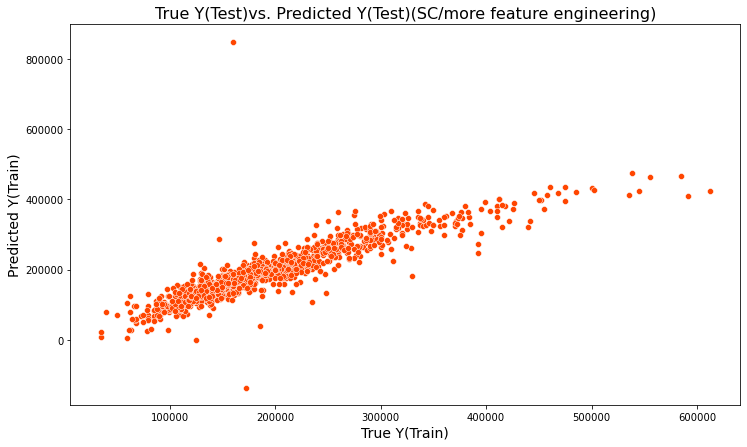

In [45]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)(SC/more feature engineering)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data= linreg2,x=y_test, y=Z_test_preds, color='orangered');
plt.savefig('../images/4th_model_test.png')


My previous model was horrible, but by using standard scaler it must have controlled for all the differences in magnitude whether its square footage vs age of the home. Properly scaling the numbers made R2 jump to 88.24% on the training set and 80.64% on the test sit and it outperforms model 1. On the other hand this model is overfit, and will need to use regularization in order to decrease the variance and hopefully get a properly fit model.

In [46]:
l_alphas = np.logspace(-3,0,100)

lasso_cv = LassoCV(alphas=l_alphas, cv=5, n_jobs=3, max_iter=50_000)

lasso_cv.fit(Z_train, y_train);

In [47]:
lasso_cv.alpha_

1.0

In [48]:
print(f"LASSO Training R-Squared: {lasso_cv.score(Z_train, y_train)} ")
print(f"LASSO Testing R-Squared: {lasso_cv.score(Z_test, y_test)} ")

LASSO Training R-Squared: 0.882448152182929 
LASSO Testing R-Squared: 0.8064846426461908 


In [49]:
lasso_preds_train=lasso_cv.predict(Z_train)

In [50]:
lasso_preds_test=lasso_cv.predict(Z_test)

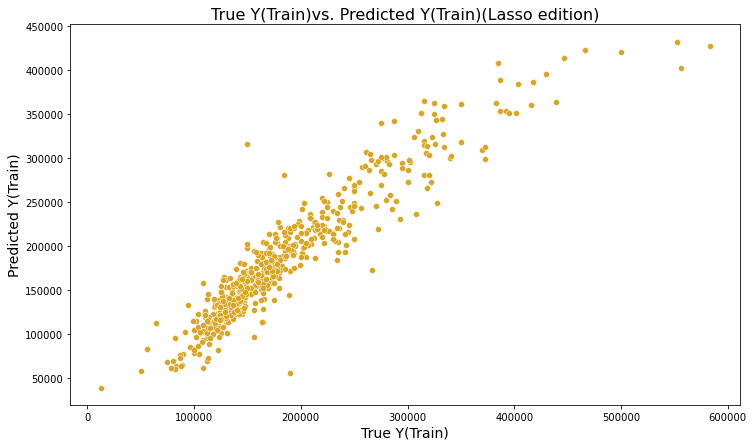

In [51]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)(Lasso edition)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data = lasso_cv ,x=y_train, y=lasso_preds_train, color='goldenrod');
plt.savefig('../images/5th_model_train.png')

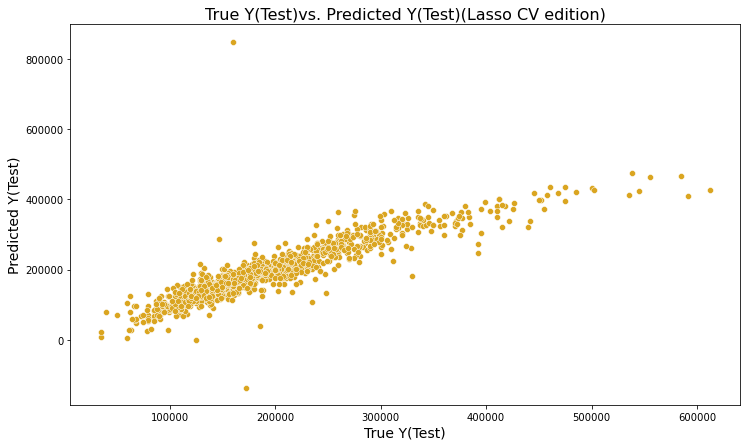

In [52]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)(Lasso CV edition)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data = lasso_cv ,x=y_test, y=lasso_preds_test, color='goldenrod');
plt.savefig('../images/5th_model_test.png')

When applying the Lasso regularization there was a miniscule improvement on the training data from 88.244810% to 88.244815%.  And a bit of an improvement with the testing data from 80.642% to 80.648% which slightly reduces the variance but still leads to an overfit model that does not generalize to new data as well as it does to the training data indicating that its still modeling too much noise in the data. 

In [53]:
r_alphas=np.logspace(0,5,100)


ridge_cv=RidgeCV(alphas= r_alphas, scoring='r2', cv=5)

ridge_cv.fit(Z_train,y_train);

In [54]:
ridge_cv.alpha_

148.4968262254465

In [55]:
ridge_preds_train=ridge_cv.predict(Z_train)

In [56]:
ridge_preds_test=ridge_cv.predict(Z_test)

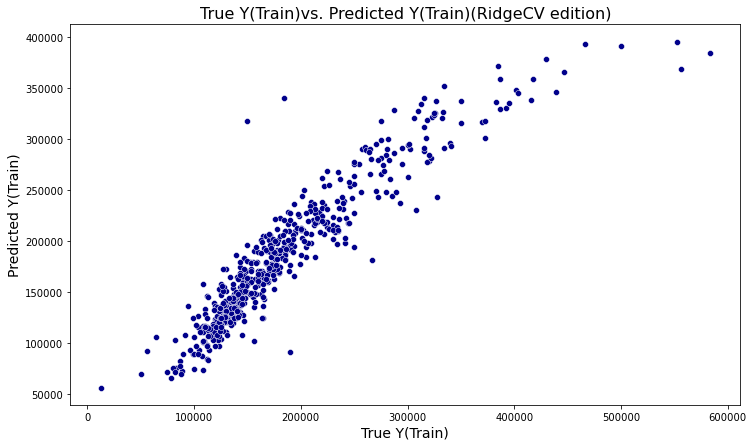

In [57]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)(RidgeCV edition)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data = ridge_cv ,x=y_train, y=ridge_preds_train, color='darkblue');
plt.savefig('../images/6th_model_train.png')

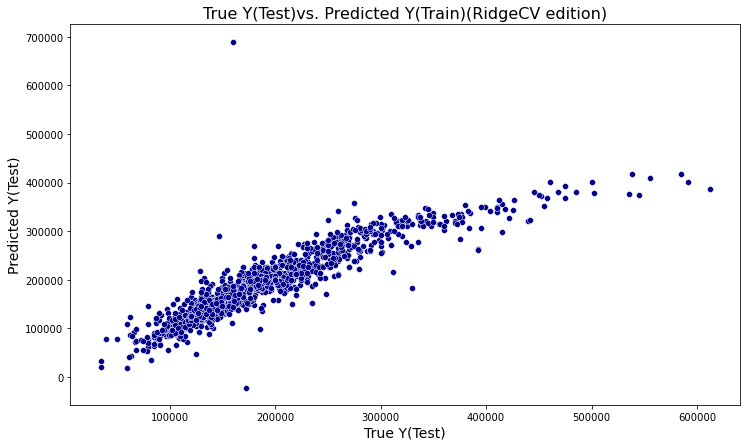

In [58]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Train)(RidgeCV edition)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data = ridge_cv ,x=y_test, y=ridge_preds_test, color='darkblue');
plt.savefig('../images/6th_model_test.png')

In [59]:
print(f"Ridge CV Training R2: {ridge_cv.score(Z_train, y_train)}")
print(f"Ridge CV Testing R2: {ridge_cv.score(Z_test, y_test)}")

Ridge CV Training R2: 0.8630226517389401
Ridge CV Testing R2: 0.8254597867193536


When applying the Ridge regression with an optimal alpha, we get a training R2 of 86.30% while the testing R2 is 82.54%.  When we compare it to the Lasso regression model we have a slight decline in improvement from 88.24% to the aforemention 86.30%, but we have an improvement with the testing as it increases from 80.64% to 82.54%.  This model generalizes slightly better to newer data and has decreased its variance but is still modeling to some of the noise in the data.  While the model is still overfit we are trending in the right direction. If we are to improve the balance of the bias-variance we may have to couple regularization with decreasing complexity of the model.  If we go back to our original baseline model, that scored 67.59% for testing data.  This latest iteration of the model has increase by about 15 points in accuracy.

In [60]:
pd.DataFrame(list(zip(features_2,ridge_cv.coef_)), columns=['Feature',"Coefficient"]).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
4,overall_qual,12680.884449
47,high_qual,11283.365158
15,gr_liv_area,7882.035335
10,total_bsmt_sf,7455.009678
25,garage_area,6709.306491
22,totrms_abvgrd,5308.876443
5,overall_cond,5283.853164
7,bsmtfin_sf_1,5246.924171
12,1st_flr_sf,5141.172230
6,year_built,5134.706201


In [61]:
train_df_2=pd.read_csv('../datasets/train_eda_engineered_2.csv')
train_df_2.head()

,id,pid,ms_subclass,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,ms_zoning_FV,ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,age_home
0,109,533352170,60,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,6,8,1976,2005-01-01,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,1,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,6,Typ,0,Attchd,RFn,2.0,475.0,TA,TA,1,0,44,0,0,0,0,0,3,2010,WD,130500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,34
1,544,531379050,60,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,7,5,1996,1997-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,1,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,8,Typ,1,Attchd,RFn,2.0,559.0,TA,TA,1,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,13
2,153,535304180,20,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,5,7,1953,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,1,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,5,Typ,0,Detchd,Unf,1.0,246.0,TA,TA,1,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,57
3,318,916386060,60,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,5,5,2006,2007-01-01,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,1,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,7,Typ,0,BuiltIn,Fin,2.0,400.0,TA,TA,1,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,4
4,255,906425045,50,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,6,8,1900,1993-01-01,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,1,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,6,Typ,0,Detchd,Unf,2.0,484.0,TA,TA,0,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110


In [62]:
train_df_2.corr()[['saleprice']].sort_values(by='saleprice',ascending=False)

,saleprice
saleprice,1.000000
overall_qual,0.793771
gr_liv_area,0.707227
high_qual,0.697947
garage_cars,0.653573
garage_area,0.646123
1st_flr_sf,0.625741
total_bsmt_sf,0.624425
best_gr_liv_area,0.578111
year_built,0.556128


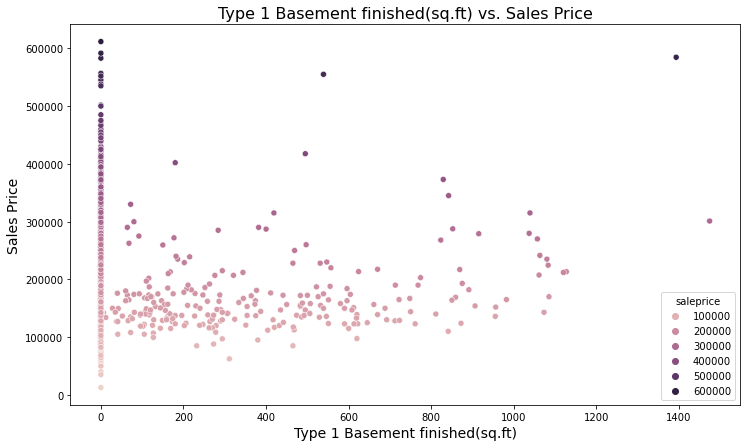

In [63]:
plt.figure(figsize = (12,7))
plt.title('Type 1 Basement finished(sq.ft) vs. Sales Price',fontdict={'fontsize': 16})
plt.xlabel('Type 1 Basement finished(sq.ft)', fontdict={'fontsize': 14})
plt.ylabel('Sales Price', fontdict={'fontsize': 14})
sns.scatterplot(data= train_df_2,x=train_df_2['bsmtfin_sf_2'],
                y=train_df['saleprice'],color='steelblue', hue='saleprice');
plt.savefig('../images/bmt_fn_sf2_vs_sales.png')

Looking to get rid of features with low correlations, this one is -0.002936.

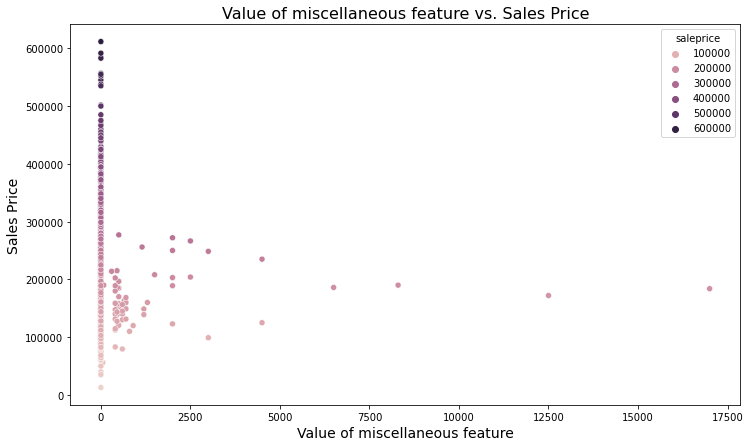

In [64]:
plt.figure(figsize = (12,7))
plt.title('Value of miscellaneous feature vs. Sales Price',fontdict={'fontsize': 16})
plt.xlabel('Value of miscellaneous feature', fontdict={'fontsize': 14})
plt.ylabel('Sales Price', fontdict={'fontsize': 14})
sns.scatterplot(data= train_df_2,x=train_df_2['misc_val'],
                y=train_df_2['saleprice'],color='steelblue', hue='saleprice');
plt.savefig('../images/misc_ft_vs_sales.png')

This one has a correlation of -0.007502

In [65]:
train_df_2.drop(columns=['mo_sold',
                         'pool_area','house_style_2.5Unf','bsmtfin_sf_2','misc_val','yr_sold',
                         'house_style_1Story','low_qual_fin_sf','ms_zoning_RH',
                         'id',], inplace=True)

In [66]:
features_3=[col for col in train_df_2._get_numeric_data().columns if col != 'saleprice']

In [67]:
X_3=train_df_2[features_3]
y_3=train_df_2['saleprice']
X_3.head()

,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,bsmtfin_sf_1,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,ms_zoning_FV,ms_zoning_RL,ms_zoning_RM,house_style_1.5Unf,house_style_2.5Fin,house_style_2Story,house_style_SFoyer,house_style_SLvl,high_qual,best_gr_liv_area,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,age_home
0,533352170,60,13517,6,8,1976,533.0,192.0,725.0,1,725,754,1479,0.0,0.0,2,1,3,1,6,0,2.0,475.0,1,0,44,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,34
1,531379050,60,11492,7,5,1996,637.0,276.0,913.0,1,913,1209,2122,1.0,0.0,2,1,4,1,8,1,2.0,559.0,1,0,74,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,13
2,535304180,20,7922,5,7,1953,731.0,326.0,1057.0,1,1057,0,1057,1.0,0.0,1,0,3,1,5,0,1.0,246.0,1,0,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,57
3,916386060,60,9802,5,5,2006,0.0,384.0,384.0,1,744,700,1444,0.0,0.0,2,1,3,1,7,0,2.0,400.0,1,100,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,4
4,906425045,50,14235,6,8,1900,0.0,676.0,676.0,1,831,614,1445,0.0,0.0,2,0,3,1,6,0,2.0,484.0,0,0,59,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110


In [68]:
poly_2=PolynomialFeatures(include_bias=False)

X_poly_3=poly_2.fit_transform(X_3)

In [69]:
X_train, X_test, y_train, y_test= train_test_split(X_3, y_3, test_size=.7, random_state=42)

In [70]:
sc=StandardScaler()
Z_train_2=sc.fit_transform(X_train)
Z_test_2=sc.transform(X_test)


In [71]:
linreg3=LinearRegression()

In [72]:
linreg3.fit(Z_train_2,y_train)

LinearRegression()

In [73]:
lin3_train_preds=linreg3.predict(Z_train_2)
lin3_test_preds=linreg3.predict(Z_test_2)

In [74]:
#RMSE for training
mean_squared_error(y_true=y_train, y_pred=lin3_train_preds, squared=False)

30655.208197061325

In [75]:
#RMSE for testing
mean_squared_error(y_true=y_test, y_pred=lin3_test_preds, squared=False)

31298.112565430813

In [76]:
print(f"Training R-Squared: {linreg3.score(Z_train_2, y_train)}")
print(f"Testing R-Squared: {linreg3.score(Z_test_2, y_test)}")

Training R-Squared: 0.8417500971071448
Testing R-Squared: 0.8443535906543216


Decided to be more selective with the features, and dropped those with extremely low correlations.  This has lead to a very slightly underfit model that scores less on training data at 84.17% but scored the highest yet on the testing data with a score of 84.44%.  This model seems to have a bit more bias than any of my previous models, thus it is underfit, and therefore does not need regularization. This model does the best job in finding that optimal sweet spot where we are balancing the bias and variance in order to minimize error.
Reference:lesson Bias-Variance

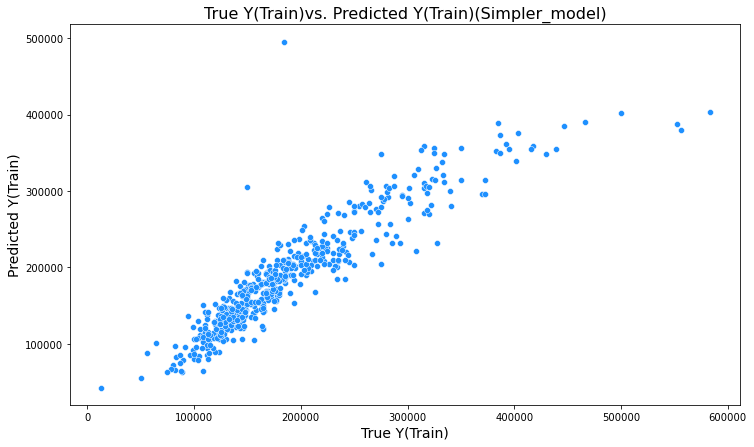

In [77]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)(Simpler_model)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data = linreg3 ,x=y_train, y=lin3_train_preds, color='dodgerblue');
plt.savefig('../images/7th_model_train.png')

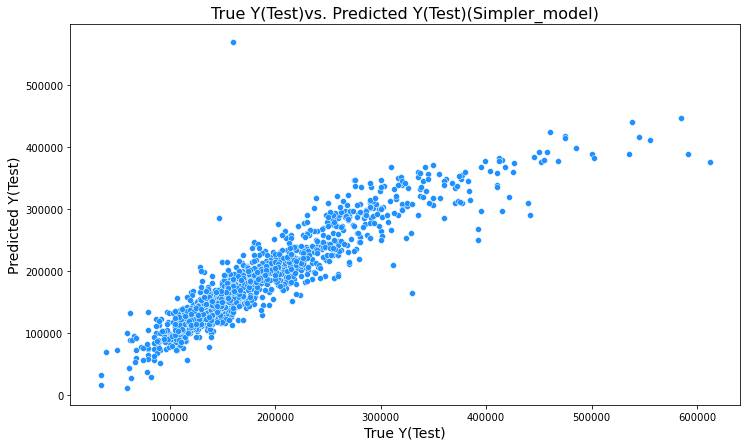

In [78]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)(Simpler_model)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data = linreg3 ,x=y_test, y=lin3_test_preds, color='dodgerblue');
plt.savefig('../images/7th_model_test.png')

In [79]:
pd.DataFrame(list(zip(features_3,linreg3.coef_)), columns=['Feature',"Coefficient"]).sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
11,2nd_flr_sf,16565.234524
3,overall_qual,14837.335487
37,high_qual,13405.094836
8,total_bsmt_sf,8361.509002
10,1st_flr_sf,8286.291495
4,overall_cond,7469.379562
22,garage_area,6425.196250
15,full_bath,5391.309805
2,lot_area,4975.149023
21,garage_cars,4621.266560


### Conclusion & Recommendations

The initial premise here was to predict a price for a home using a linear regression model that outperforms a baseline model.  After iterating through several models, I selected a Linear Regression model that whittled down features based on very poor correlation.  From there the polynomial features transformation and the standard scaler were applied.  This ended up having the best R2 Score for testing portion of the train-test-split.  It had an R2 score of 84.44% which was an improvement over the baseline of the original model many iterations ago, that baseline had a score of 67.59%.  There was a 17 point improvement in score.  In other words there was a 67.59% of the variance in our sales price  that could be explained by the features in our model to begin with, and that has improved to 84.44% of the variance/variability in our sales price that could be explained by the features in our model. Also worth noting that the RMSE of this model was 31298.11 which is a decrease from the first mode RMSE of 42229.12. This can be good because you want RMSE as close to 0 as possible and is in the dollar units of salesprice so in a sense the predicted y is closer to actual y. This is something that could help benefit homeowners and the real estate agents that work with them as far as being able to know what an adequate price is that would enable them to sell the home.  As we know from the research portion of this being overpriced will not allow for you to sell the home and underpricing it really harms the homeowner. Future steps to move the project forward would involve even more research that could help feature engineer even more useful x variables that could contribute to the model.